In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML, display
import tabulate
import re
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
api_data = pd.read_csv("../../data/api_data.csv")

print(f"CSV has {len(api_data)} projects.")

CSV has 2731 projects.


In [3]:
api_data

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,146.0,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,9.0,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,628.0,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,3467722,pingpongboss/Phone-Modem,NaN,1,False,pingpongboss/Phone-Modem,/pingpongboss/Phone-Modem,30.0,False,False,...,0.0,0.0,0.0,5.0,9.0,9.0,24.0,2.0,1.0,0.0
2727,3468682,htdvisser/Skt,NaN,1,True,htdvisser/Skt,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,2130242,justjoheinz/STLDroid,NaN,1,False,justjoheinz/STLDroid,/justjoheinz/STLDroid,10.0,False,False,...,1.0,0.0,0.0,1.0,4.0,4.0,24.0,1.0,1.0,5.0
2729,3355503,SpoutDev/BukkitBridge,NaN,1,False,SpoutDev/BukkitBridge,/SpoutDev/BukkitBridge,19.0,False,False,...,0.0,53.0,0.0,17.0,9.0,9.0,248.0,21.0,1.0,0.0


In [4]:
conflicting_merges_per_project = pd.read_csv("../../data/number_conflicting_merges_project_selected.csv")
conflicting_merges_per_project

,id,project,nr_conflicting_merges
0,65885,android/platform_frameworks_base,3355
1,185026,freenet/fred,237
2,206437,apache/directory-server,18
3,217482,Ramblurr/Anki-Android,155
4,223355,alexo/wro4j,395
5,507775,elastic/elasticsearch,235
6,726492,getrailo/railo,163
7,762119,atlasapi/atlas,418
8,961036,hibernate/hibernate-orm,27
9,1006053,TeamDev-Ltd/OpenFaces,178


In [5]:
merges_per_project = pd.read_csv("../../data/number_merges_project_selected.csv")
merges_per_project

,id,project,nr_merges
0,65885,android/platform_frameworks_base,156732
1,185026,freenet/fred,1076
2,206437,apache/directory-server,50
3,217482,Ramblurr/Anki-Android,952
4,223355,alexo/wro4j,1458
5,507775,elastic/elasticsearch,2442
6,726492,getrailo/railo,671
7,762119,atlasapi/atlas,2284
8,961036,hibernate/hibernate-orm,152
9,1006053,TeamDev-Ltd/OpenFaces,611


In [6]:
merges_csv = pd.merge(merges_per_project, conflicting_merges_per_project, on='project', how='inner')
merges_csv = merges_csv.drop(columns=['id_y'])
merges_csv = merges_csv.rename(columns={'id_x':'id'})
merges_csv

,id,project,nr_merges,nr_conflicting_merges
0,65885,android/platform_frameworks_base,156732,3355
1,185026,freenet/fred,1076,237
2,206437,apache/directory-server,50,18
3,217482,Ramblurr/Anki-Android,952,155
4,223355,alexo/wro4j,1458,395
5,507775,elastic/elasticsearch,2442,235
6,726492,getrailo/railo,671,163
7,762119,atlasapi/atlas,2284,418
8,961036,hibernate/hibernate-orm,152,27
9,1006053,TeamDev-Ltd/OpenFaces,611,178


In [7]:
selected_dataset_2 = pd.read_csv("../../data/selected_dataset_2.csv")
selected_dataset_2

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Method signature,Other,Blank,Array initializer,Switch statement,Static initializer,Do statement,Method declaration,Attribute,Catch clause
0,777206,ConcatenationV2V1,427,436,434,"Attribute, Comment, Method invocation",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,...,0,0,0,0,0,0,0,0,1,0
1,777207,Version 1,2826,2871,2827,"Comment, Method declaration",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,...,0,0,0,0,0,0,0,1,0,0
2,777216,Combination,2458,2465,2463,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,...,0,0,0,0,0,0,0,0,0,0
3,777218,Combination,2476,2482,2479,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,...,0,0,0,0,0,0,0,0,0,0
4,777221,Version 1,750,753,751,"Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70281,1658387,Version 1,173,227,200,"Method signature, Try statement",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,...,1,0,0,0,0,0,0,0,0,0
70282,1658389,Version 1,833,841,837,"Method invocation, Method signature, Return st...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,...,1,0,0,0,0,0,0,0,0,0
70283,1658390,Version 1,859,875,867,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,...,1,0,0,0,0,0,0,0,0,0
70284,1658391,Version 1,890,906,898,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,...,1,0,0,0,0,0,0,0,0,0


In [8]:
selected_dataset_2.columns

Index(['chunk_id', 'developerdecision', 'line_start', 'line_end',
       'line_separator', 'kind_conflict', 'url', 'project', 'project_user',
       'project_name', 'path', 'file_name', 'sha', 'leftsha', 'rightsha',
       'basesha', 'left_lines_added', 'left_lines_removed',
       'right_lines_added', 'right_lines_removed', 'conclusion_delay',
       'keyword_fix', 'keyword_bug', 'keyword_feature', 'keyword_improve',
       'keyword_document', 'keyword_refactor', 'keyword_update', 'keyword_add',
       'keyword_remove', 'keyword_use', 'keyword_delete', 'keyword_change',
       'leftCC', 'rightCC', 'fileCC', 'chunkAbsSize', 'chunkRelSize',
       'chunkPosition', 'fileSize', 'chunk_left_abs_size',
       'chunk_left_rel_size', 'chunk_right_abs_size', 'chunk_right_rel_size',
       'Branching time', 'Merge isolation time', 'Devs 1', 'Devs 2',
       'Different devs', 'Same devs', 'Devs intersection', 'Commits 1',
       'Commits 2', 'Changed files 1', 'Changed files 2',
       'Changed 

In [9]:
chunks_per_project = selected_dataset_2.groupby(['project']).count()['chunk_id']
chunks_per_project

project
AOKP/frameworks_base_disabled                                     2498
CCI-MIT/XCoLab                                                    6889
CloudStack-extras/CloudStack-archive                              1779
IceColdSandwich/android_frameworks_base                           2240
Ramblurr/Anki-Android                                             1115
RealVNC/android-frameworks-base-with-screenshot-tweaks            2836
SINTEF-9012/ThingML                                               1277
TeamDev-Ltd/OpenFaces                                             3723
Unidata/thredds                                                   1442
adetaylor/android-frameworks-base-with-remote-control-service     2240
alexo/wro4j                                                       2078
alkacon/opencms-core                                              1153
allwinner-ics/platform_frameworks_base                            2224
android/platform_frameworks_base                                  444

In [10]:
join_api_selected = pd.merge(api_data, chunks_per_project, on='project', how='inner')
join_api_selected[['project_actual_ownername','chunks', 'chunk_id']]

,project_actual_ownername,chunks,chunk_id
0,sebastianbenz/Jnario,10372,10372
1,CCI-MIT/XCoLab,6889,6889
2,apache/accumulo,5141,5141
3,aosp-mirror/platform_frameworks_base,4446,4446
4,TeamDev-Archive/OpenFaces,3723,3723
5,VNCAutomotive/android-frameworks-base-with-scr...,2836,2836
6,jgralab/jgralab,2590,2590
7,AOKP/frameworks_base_disabled,2498,2498
8,adetaylor/android-frameworks-base-with-remote-...,2240,2240
9,IceColdSandwich/android_frameworks_base,2240,2240


## Characteristics of the Projects

In [11]:
selected_projects = api_data[api_data.chunks >= 1000]
selected_projects

,id,project,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,isFork,deleteBranchOnMerge,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,3518171,sebastianbenz/Jnario,NaN,10372,False,sebastianbenz/Jnario,/sebastianbenz/Jnario,133.0,False,False,...,146.0,35.0,0.0,19.0,32.0,37.0,1303.0,9.0,19.0,20.0
1,3661343,CCI-MIT/XCoLab,NaN,6889,False,CCI-MIT/XCoLab,/CCI-MIT/XCoLab,15.0,False,False,...,9.0,288.0,0.0,8.0,10.0,10.0,10045.0,25.0,97.0,0.0
2,2524488,apache/accumulo,NaN,5141,False,apache/accumulo,/apache/accumulo,864.0,False,False,...,628.0,1394.0,0.0,88.0,333.0,351.0,10876.0,131.0,3.0,38.0
3,65885,android/platform_frameworks_base,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,False,False,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
4,1006053,TeamDev-Ltd/OpenFaces,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,False,False,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0
5,4212733,RealVNC/android-frameworks-base-with-screensho...,VNCAutomotive/android-frameworks-base-with-scr...,2836,False,VNCAutomotive/android-frameworks-base-with-scr...,/VNCAutomotive/android-frameworks-base-with-sc...,4.0,False,False,...,0.0,0.0,0.0,18.0,3.0,3.0,62550.0,83.0,11.0,1.0
6,3405664,jgralab/jgralab,NaN,2590,False,jgralab/jgralab,/jgralab/jgralab,15.0,False,False,...,8.0,0.0,0.0,13.0,3.0,3.0,7630.0,11.0,8.0,70.0
7,2902099,AOKP/frameworks_base_disabled,NaN,2498,False,AOKP/frameworks_base_disabled,/AOKP/frameworks_base_disabled,98.0,False,False,...,1.0,77.0,0.0,8.0,69.0,75.0,78600.0,210.0,3.0,1.0
8,3518362,adetaylor/android-frameworks-base-with-remote-...,NaN,2240,False,adetaylor/android-frameworks-base-with-remote-...,/adetaylor/android-frameworks-base-with-remote...,2.0,False,False,...,0.0,0.0,0.0,1.0,1.0,2.0,62743.0,83.0,3.0,0.0
9,3129899,IceColdSandwich/android_frameworks_base,NaN,2240,False,IceColdSandwich/android_frameworks_base,/IceColdSandwich/android_frameworks_base,13.0,False,False,...,0.0,3.0,0.0,1.0,3.0,3.0,63311.0,204.0,7.0,0.0


In [12]:
join_api_merges_csv = pd.merge(merges_csv, selected_projects, on='project', how='inner')
join_api_merges_csv = join_api_merges_csv.drop(columns=['id_y'])
join_api_merges_csv = join_api_merges_csv.rename(columns={'id_x':'id'})

join_api_merges_csv

,id,project,nr_merges,nr_conflicting_merges,project_new_ownername,chunks,repo_not_found,project_actual_ownername,resourcePath,stargazerCount,...,issues,pullRequests,releases,watchers,forks,forkCount,commits,contributors,branches,tags
0,65885,android/platform_frameworks_base,156732,3355,aosp-mirror/platform_frameworks_base,4446,False,aosp-mirror/platform_frameworks_base,/aosp-mirror/platform_frameworks_base,9532.0,...,0.0,111.0,0.0,911.0,5360.0,5901.0,566598.0,763.0,250.0,1034.0
1,185026,freenet/fred,1076,237,NaN,1584,False,freenet/fred,/freenet/fred,685.0,...,0.0,722.0,48.0,87.0,161.0,171.0,30800.0,71.0,99.0,2015.0
2,206437,apache/directory-server,50,18,NaN,1056,False,apache/directory-server,/apache/directory-server,82.0,...,0.0,41.0,0.0,24.0,60.0,63.0,9797.0,39.0,95.0,51.0
3,217482,Ramblurr/Anki-Android,952,155,NaN,1115,False,Ramblurr/Anki-Android,/Ramblurr/Anki-Android,80.0,...,0.0,0.0,0.0,16.0,33.0,309.0,4888.0,31.0,4.0,0.0
4,223355,alexo/wro4j,1458,395,NaN,2078,False,alexo/wro4j,/alexo/wro4j,444.0,...,125.0,103.0,0.0,35.0,113.0,114.0,3619.0,37.0,55.0,46.0
5,507775,elastic/elasticsearch,2442,235,NaN,1557,False,elastic/elasticsearch,/elastic/elasticsearch,54627.0,...,26815.0,45097.0,44.0,2781.0,19045.0,19739.0,58486.0,3118.0,118.0,293.0
6,726492,getrailo/railo,671,163,NaN,1018,False,getrailo/railo,/getrailo/railo,246.0,...,0.0,441.0,0.0,43.0,86.0,87.0,3990.0,16.0,6.0,164.0
7,762119,atlasapi/atlas,2284,418,NaN,1383,False,atlasapi/atlas,/atlasapi/atlas,32.0,...,26.0,1490.0,0.0,11.0,7.0,9.0,7182.0,45.0,506.0,7.0
8,961036,hibernate/hibernate-orm,152,27,NaN,1249,False,hibernate/hibernate-orm,/hibernate/hibernate-orm,4595.0,...,0.0,3881.0,16.0,321.0,2843.0,2946.0,10772.0,420.0,21.0,225.0
9,1006053,TeamDev-Ltd/OpenFaces,611,178,TeamDev-Archive/OpenFaces,3723,False,TeamDev-Archive/OpenFaces,/TeamDev-Archive/OpenFaces,28.0,...,173.0,3.0,0.0,19.0,14.0,15.0,3293.0,18.0,8.0,8.0


In [13]:
selected_projects_table = join_api_merges_csv[["id", "project_actual_ownername", "chunks", "nr_merges", "nr_conflicting_merges", "stargazerCount",
                                             "commits", "contributors", "branches"]]

selected_projects_table = selected_projects_table.rename(columns={"project_actual_ownername": "Project",
                                        "nr_merges": "Merges",
                                        "nr_conflicting_merges": "Conflicting Merges",
                                        "chunks": "Chunks",
                                        "stargazerCount": "Stars",
                                        "commits": "Commits",
                                        "contributors": "Developers",
                                        "branches": "Branches"})
# float columns to int
selected_projects_table[["Chunks", "Stars", "Commits", "Developers", "Branches"]] = \
  selected_projects_table[["Chunks", "Stars", "Commits", "Developers", "Branches"]].astype(int)

selected_projects_table = selected_projects_table.sort_values(by=['Chunks'], ascending=False)
selected_projects_table

,id,Project,Chunks,Merges,Conflicting Merges,Stars,Commits,Developers,Branches
23,3518171,sebastianbenz/Jnario,10372,32,5,133,1303,9,19
25,3661343,CCI-MIT/XCoLab,6889,579,124,15,10045,25,97
18,2524488,apache/accumulo,5141,2548,784,864,10876,131,3
0,65885,aosp-mirror/platform_frameworks_base,4446,156732,3355,9532,566598,763,250
9,1006053,TeamDev-Archive/OpenFaces,3723,611,178,28,3293,18,8
26,4212733,VNCAutomotive/android-frameworks-base-with-scr...,2836,77426,1663,4,62550,83,11
22,3405664,jgralab/jgralab,2590,407,101,15,7630,11,8
20,2902099,AOKP/frameworks_base_disabled,2498,50959,1332,98,78600,210,3
24,3518362,adetaylor/android-frameworks-base-with-remote-...,2240,39639,1189,2,62743,83,3
21,3129899,IceColdSandwich/android_frameworks_base,2240,39029,1182,13,63311,204,7


### Fixing columns "Commits" and "Developers" to show data from Ghiotto's database

In [14]:
statistics_bd_project_selected = pd.read_csv("../../data/statistics_bd_project_selected.csv")
statistics_bd_project_selected

,id,project,commits,merges,conflicting_merges,developers,stars
0,65885,android/platform_frameworks_base,6964,156764,3355,115,3286
1,185026,freenet/fred,30970,1076,237,62,253
2,206437,apache/directory-server,12914,52,18,12,21
3,217482,Ramblurr/Anki-Android,4905,952,155,62,64
4,223355,alexo/wro4j,4565,1458,395,37,318
5,507775,elastic/elasticsearch,35163,2442,235,416,6359
6,726492,getrailo/railo,5215,671,163,15,266
7,762119,atlasapi/atlas,9603,2284,418,28,29
8,961036,hibernate/hibernate-orm,10754,152,27,180,1765
9,1006053,TeamDev-Ltd/OpenFaces,3611,611,178,16,9


In [15]:
commits_devs_from_BD = statistics_bd_project_selected[["id", "commits", "developers", "stars"]]
commits_devs_from_BD

,id,commits,developers,stars
0,65885,6964,115,3286
1,185026,30970,62,253
2,206437,12914,12,21
3,217482,4905,62,64
4,223355,4565,37,318
5,507775,35163,416,6359
6,726492,5215,15,266
7,762119,9603,28,29
8,961036,10754,180,1765
9,1006053,3611,16,9


In [16]:
table_projects = pd.merge(selected_projects_table, 
                                   commits_devs_from_BD,
                                   on='id', how='inner')\
        .drop(columns=['id', 'Branches', 'Developers', 'Commits', 'Stars'])\
        .rename(columns={"developers": "Developers",
                         "commits": "Commits",
                         "stars": "Stars"})

# fixing project with value 0
table_projects.at[3, 'Commits'] = 6964

# table_projects = table_projects.append(table_projects.median(numeric_only=True), ignore_index=True)
# table_projects.at[29, 'Project'] = 'Median'
table_projects

,Project,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars
0,sebastianbenz/Jnario,10372,32,5,1635,8,53
1,CCI-MIT/XCoLab,6889,579,124,3865,12,4
2,apache/accumulo,5141,2548,784,8364,56,187
3,aosp-mirror/platform_frameworks_base,4446,156732,3355,6964,115,3286
4,TeamDev-Archive/OpenFaces,3723,611,178,3611,16,9
5,VNCAutomotive/android-frameworks-base-with-scr...,2836,77426,1663,114394,90,2
6,jgralab/jgralab,2590,407,101,7871,10,13
7,AOKP/frameworks_base_disabled,2498,50959,1332,79747,116,1
8,adetaylor/android-frameworks-base-with-remote-...,2240,39639,1189,62777,88,2
9,IceColdSandwich/android_frameworks_base,2240,39029,1182,63371,115,18


In [17]:
table_projects.describe()

,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2423.655172,15312.965517,523.586207,25115.586207,65.482759,513.172414
std,2046.490171,33394.702807,715.314592,27456.007527,79.959195,1311.904996
min,1018.000000,32.000000,4.000000,1635.000000,1.000000,1.000000
25%,1275.000000,490.000000,101.000000,5215.000000,16.000000,8.000000
50%,1584.000000,1076.000000,235.000000,12914.000000,37.000000,53.000000
75%,2498.000000,5880.000000,645.000000,33294.000000,88.000000,266.000000
max,10372.000000,156732.000000,3355.000000,114394.000000,416.000000,6359.000000


In [18]:
def quantile_25(x) :
    return x.quantile(.25)

In [19]:
def quantile_50(x) :
    return x.quantile(.50)

In [20]:
def quantile_75(x) :
    return x.quantile(.75)

In [21]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
quantile_25(table_projects['Chunks'])

1275.0

In [23]:
metrics = ['sum', 'median', 'mean', 'std', 'min', quantile_25, quantile_50, quantile_75, 'max']

projects_stats = table_projects.agg({'Chunks' : 'sum',
                    'Merges' : 'sum',
                    'Conflicting Merges' : 'sum',
                    'Commits' : 'sum',
                    'Developers' : 'sum',
                    'Stars' : 'sum'
                   })

projects_stats['Project'] = 'Total'

projects_stats.to_frame().T

,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars,Project
0,70286,444076,15184,728352,1899,14882,Total


In [24]:
# table_with_stats = pd.concat([table_projects, projects_stats])
table_with_stats = table_projects.append(table_projects.sum(numeric_only=True).rename('Total'))

table_with_stats.at['Total', 'Project'] = 'Total'

table_with_stats

,Project,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars
0,sebastianbenz/Jnario,10372.0,32.0,5.0,1635.0,8.0,53.0
1,CCI-MIT/XCoLab,6889.0,579.0,124.0,3865.0,12.0,4.0
2,apache/accumulo,5141.0,2548.0,784.0,8364.0,56.0,187.0
3,aosp-mirror/platform_frameworks_base,4446.0,156732.0,3355.0,6964.0,115.0,3286.0
4,TeamDev-Archive/OpenFaces,3723.0,611.0,178.0,3611.0,16.0,9.0
5,VNCAutomotive/android-frameworks-base-with-scr...,2836.0,77426.0,1663.0,114394.0,90.0,2.0
6,jgralab/jgralab,2590.0,407.0,101.0,7871.0,10.0,13.0
7,AOKP/frameworks_base_disabled,2498.0,50959.0,1332.0,79747.0,116.0,1.0
8,adetaylor/android-frameworks-base-with-remote-...,2240.0,39639.0,1189.0,62777.0,88.0,2.0
9,IceColdSandwich/android_frameworks_base,2240.0,39029.0,1182.0,63371.0,115.0,18.0


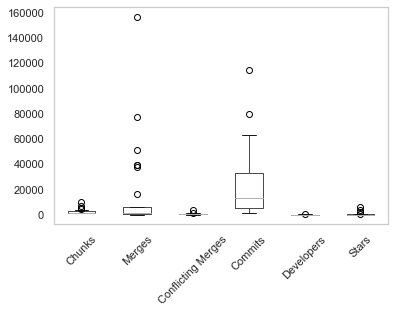

In [25]:
boxplot = table_projects.boxplot(rot=45, grid=False, column=['Chunks', 'Merges', 'Conflicting Merges', 'Commits', 'Developers', 'Stars'])

### LaTeX output

In [26]:
# with pd.option_context("max_colwidth", None):
#   print(table_projects.to_latex(index=False))

with pd.option_context("max_colwidth", None):
  print(table_with_stats.to_latex(index=False, float_format="{:,.0f}".format))

\begin{tabular}{lrrrrrr}
\toprule
                                                      Project &  Chunks &  Merges &  Conflicting Merges &  Commits &  Developers &  Stars \\
\midrule
                                         sebastianbenz/Jnario &  10,372 &      32 &                   5 &    1,635 &           8 &     53 \\
                                               CCI-MIT/XCoLab &   6,889 &     579 &                 124 &    3,865 &          12 &      4 \\
                                              apache/accumulo &   5,141 &   2,548 &                 784 &    8,364 &          56 &    187 \\
                         aosp-mirror/platform\_frameworks\_base &   4,446 & 156,732 &               3,355 &    6,964 &         115 &  3,286 \\
                                    TeamDev-Archive/OpenFaces &   3,723 &     611 &                 178 &    3,611 &          16 &      9 \\
 VNCAutomotive/android-frameworks-base-with-screenshot-tweaks &   2,836 &  77,426 &               1,663 &  11

## Attributes

In [27]:
attributes = pd.read_csv("../../data/attributes.csv")
attributes

,Category,Attribute,Scope,Name in the dataset,References,Reference source,Details,Reasoning,Easy to retrieve?,How to retrieve,Status
0,Size,Number of commit authors,Merge,"Devs 1, Devs 2","Dias et al., 2020; Menezes et al., 2020 (no ge...",Related work,The geometric mean of the number of commit aut...,Attributes that are related to the complexity ...,Yes,Use git to retrieve all commit authors in comm...,Collected
1,Size,Number of commits,Merge,"Commits 1, Commits 2","Dias et al., 2020; Lessenich et al., 2018; Men...",Related work,The geometric mean of the number of commits in...,Attributes that are related to the complexity ...,Yes,Use git to retrieve all commits between the me...,Collected
2,Size,Number of changed files,Merge,"Changed files 1, Changed files 2","Dias et al., 2020; Lessenich et al., 2018 (no ...",Related work,The geometric mean of the number of changed fi...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the number of changed file...,Collected
3,Size,Number of simultaneously changed files,Merge,Changed files intersection,"Owhadi-Kareshk et al., 2019; Ziegler, 2017; K...",Related work,Counts the number of files that were modified ...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the name of changed files ...,Collected
4,Size,Number of changed lines (code churn),Merge,"left_lines_added, left_lines_removed, right_li...","Dias et al., 2020; Lessenich et al., 2018; Owh...",Related work,The geometric mean of the number of modified l...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the number of changed line...,Collected
5,Authorship,Number of the same devs in the merge,Merge,Same devs,"Menezes et al., 2020",Related work,Number of authors that contributed to both bra...,Our hypothesis is that conflicts that are clas...,Yes,Use the author's tool https://github.com/catar...,Collected
6,Authorship,Number of different devs in the merge,Merge,Different devs,"Menezes et al., 2020",Related work,Number of different authors that participated ...,Attributes that are related to the complexity ...,Yes,Use the author's tool https://github.com/catar...,Collected
7,Authorship,Percentage of self-conflicts,Chunk,self_conflict_perc,-,Authors' intuition,Represents the percentage of self-conflicts in...,Our hypothesis is that conflicts that are clas...,Yes,Use our own scripts.,Collected
8,Authorship,Authors involved in the conflict,Chunk,One column per author project,-,Authors' intuition,Binary variable where 1 indicates that an auth...,Our hypothesis is that the choice of specific ...,Yes,Use our own scripts.,Collected
9,Merge type,Branch merge message indicator,Merge,has_branch_merge_message_indicator,-,Authors' intuition,This boolean attribute has a True value when t...,Our hypothesis is that explicit merge (branch ...,Yes,Derive from commit message,NaN


In [33]:
attributes_used = attributes[attributes["Name in the dataset"].notna()]
print(f"{attributes_used.shape[0]} atributes used at the dataset.") 

23 atributes used at the dataset.


In [34]:
attributes_used

,Category,Attribute,Scope,Name in the dataset,References,Reference source,Details,Reasoning,Easy to retrieve?,How to retrieve,Status
0,Size,Number of commit authors,Merge,"Devs 1, Devs 2","Dias et al., 2020; Menezes et al., 2020 (no ge...",Related work,The geometric mean of the number of commit aut...,Attributes that are related to the complexity ...,Yes,Use git to retrieve all commit authors in comm...,Collected
1,Size,Number of commits,Merge,"Commits 1, Commits 2","Dias et al., 2020; Lessenich et al., 2018; Men...",Related work,The geometric mean of the number of commits in...,Attributes that are related to the complexity ...,Yes,Use git to retrieve all commits between the me...,Collected
2,Size,Number of changed files,Merge,"Changed files 1, Changed files 2","Dias et al., 2020; Lessenich et al., 2018 (no ...",Related work,The geometric mean of the number of changed fi...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the number of changed file...,Collected
3,Size,Number of simultaneously changed files,Merge,Changed files intersection,"Owhadi-Kareshk et al., 2019; Ziegler, 2017; K...",Related work,Counts the number of files that were modified ...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the name of changed files ...,Collected
4,Size,Number of changed lines (code churn),Merge,"left_lines_added, left_lines_removed, right_li...","Dias et al., 2020; Lessenich et al., 2018; Owh...",Related work,The geometric mean of the number of modified l...,Attributes that are related to the complexity ...,Yes,Use git to retrieve the number of changed line...,Collected
5,Authorship,Number of the same devs in the merge,Merge,Same devs,"Menezes et al., 2020",Related work,Number of authors that contributed to both bra...,Our hypothesis is that conflicts that are clas...,Yes,Use the author's tool https://github.com/catar...,Collected
6,Authorship,Number of different devs in the merge,Merge,Different devs,"Menezes et al., 2020",Related work,Number of different authors that participated ...,Attributes that are related to the complexity ...,Yes,Use the author's tool https://github.com/catar...,Collected
7,Authorship,Percentage of self-conflicts,Chunk,self_conflict_perc,-,Authors' intuition,Represents the percentage of self-conflicts in...,Our hypothesis is that conflicts that are clas...,Yes,Use our own scripts.,Collected
8,Authorship,Authors involved in the conflict,Chunk,One column per author project,-,Authors' intuition,Binary variable where 1 indicates that an auth...,Our hypothesis is that the choice of specific ...,Yes,Use our own scripts.,Collected
9,Merge type,Branch merge message indicator,Merge,has_branch_merge_message_indicator,-,Authors' intuition,This boolean attribute has a True value when t...,Our hypothesis is that explicit merge (branch ...,Yes,Derive from commit message,NaN


In [44]:
attrs_table = attributes_used[['Category', 'Attribute', 'Scope', 'Details']]\
                .sort_values(by=['Category', 'Scope'])\
                .rename(columns={'Details':'Description'})
attrs_table

,Category,Attribute,Scope,Description
7,Authorship,Percentage of self-conflicts,Chunk,Represents the percentage of self-conflicts in...
8,Authorship,Authors involved in the conflict,Chunk,Binary variable where 1 indicates that an auth...
5,Authorship,Number of the same devs in the merge,Merge,Number of authors that contributed to both bra...
6,Authorship,Number of different devs in the merge,Merge,Number of different authors that participated ...
31,Authorship,Existence of the same developers in both branches,Merge,This attribute represents the existence of one...
32,Change-type,Frequency of Keywords in commit message,Merge,"Owhadi-Kareshk et al., 2019 use 12 different k..."
20,Complexity,Chunk Cyclomatic Complexity,Chunk,Cyclomatic Complexity of the conflicting chunk...
21,Complexity,File Cyclomatic Complexity,File,Cyclomatic Complexity of the file where a conf...
25,Composition,Programming language Constructs,Chunk,Programming language constructors (e.g. attrib...
24,Location,Conflicting chunk starting line position,Chunk,If we break down the file where the conflictin...


In [45]:
with pd.option_context("max_colwidth", None):
  print(attrs_table.to_latex(index=False, float_format="{:,.0f}".format))

\begin{tabular}{llll}
\toprule
   Category &                                         Attribute & Scope &                                                                                                                                                                                                                                                                                                                                                                                           Description \\
\midrule
 Authorship &                      Percentage of self-conflicts & Chunk &                                                                                                                                                             Represents the percentage of self-conflicts in a conflicting chunk. Calculated by the division of the number of chunk authors that participated in both sides of the chunk by the total number of authors that participated in the chunk. \\
 Authorship &             